In [2]:
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the Dataset
data_path = 'train.csv'
data = pd.read_csv(data_path)

print("Dataset Info:")
print(data.info())
print(data.head())

def process_image(image_link):
    try:
        response = requests.get(image_link, stream=True, timeout=10)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img = img.resize((224, 224))  # Resize to a fixed size
            img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            return img_array
        else:
            print(f"Failed to download {image_link}: HTTP status {response.status_code}")
            return None
    except Exception as e:
        print(f"Error processing {image_link}: {e}")
        return None

def process_images_in_batches(image_links, labels, entity_names, batch_size=32, max_batches=5):
    all_images = []
    all_labels = []
    all_entity_names = []
    for i in range(0, min(len(image_links), max_batches * batch_size), batch_size):
        batch_links = image_links[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        batch_entity_names = entity_names[i:i+batch_size]
        batch_images = []
        for link, label, entity_name in tqdm(zip(batch_links, batch_labels, batch_entity_names), desc=f"Processing batch {i//batch_size + 1}", total=len(batch_links)):
            img_array = process_image(link)
            if img_array is not None:
                batch_images.append(img_array)
                all_labels.append(label)
                all_entity_names.append(entity_name)
        if batch_images:
            all_images.extend(batch_images)
            print(f"Batch {i//batch_size + 1}:")
            print(f"  Shape: {np.array(batch_images).shape}")
            print(f"  Number of images: {len(batch_images)}")
            print(f"  Min value: {np.min(batch_images):.4f}")
            print(f"  Max value: {np.max(batch_images):.4f}")
            print(f"  Mean value: {np.mean(batch_images):.4f}")
            print(f"  Standard deviation: {np.std(batch_images):.4f}")
            print()
        
        if i//batch_size + 1 >= max_batches:
            break
    
    return np.array(all_images), np.array(all_labels), np.array(all_entity_names)

# Process first 4 batches of images in the training set
image_links = data['image_link'].values
labels = data['entity_value'].values
entity_names = data['entity_name'].values

# Use LabelEncoder for labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, y_train, entity_names_train = process_images_in_batches(image_links, encoded_labels, entity_names, max_batches=4)

# Save the processed data
np.save('X_train_4batches.npy', X_train)
np.save('y_train_4batches.npy', y_train)
np.save('entity_names_4batches.npy', entity_names_train)

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')

print("Processed data saved as 'X_train_4batches.npy', 'y_train_4batches.npy', and 'entity_names_4batches.npy'")
print("Label encoder saved as 'label_encoder.joblib'")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263859 entries, 0 to 263858
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   image_link    263859 non-null  object
 1   group_id      263859 non-null  int64 
 2   entity_name   263859 non-null  object
 3   entity_value  263859 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.1+ MB
None
                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0

Processing batch 1: 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]


Batch 1:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.7428
  Standard deviation: 0.2985



Processing batch 2: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


Batch 2:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.6791
  Standard deviation: 0.3497



Processing batch 3: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]


Batch 3:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.6752
  Standard deviation: 0.3278



Processing batch 4: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]


Batch 4:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.7330
  Standard deviation: 0.3321



Processing batch 5: 100%|██████████| 32/32 [00:10<00:00,  3.15it/s]


Batch 5:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.8132
  Standard deviation: 0.2721



Processing batch 6: 100%|██████████| 32/32 [00:10<00:00,  3.01it/s]


Batch 6:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.7612
  Standard deviation: 0.3181



Processing batch 7: 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


Batch 7:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.7058
  Standard deviation: 0.3307



Processing batch 8: 100%|██████████| 32/32 [00:09<00:00,  3.22it/s]


Batch 8:
  Shape: (32, 224, 224, 3)
  Number of images: 32
  Min value: 0.0000
  Max value: 1.0000
  Mean value: 0.7710
  Standard deviation: 0.2814

Processing complete.
Total number of images processed: 256
Shape of processed training data: (256, 224, 224, 3)
Shape of training labels: (256,)
Processed data saved as 'X_train_8batches.npy' and 'y_train_8batches.npy'


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]  

 Total params: 12,325,669 (47.02 MB)

 Trainable params: 12,316,069 (46.98 MB)

 Non-trainable params: 9,600 (37.50 KB)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0031 - loss: 5.7284 - val_accuracy: 0.0000e+00 - val_loss: 151.6753 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.0436 - loss: 5.2842 - val_accuracy: 0.0000e+00 - val_loss: 3609.0034 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.0207 - loss: 4.9152 - val_accuracy: 0.0000e+00 - val_loss: 4302.9795 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0423 - loss: 4.7199 - val_accuracy: 0.0000e+00 - val_loss: 3669.2578 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0452 - loss: 4.7528 - val_accuracy: 0.0000e+00 - val_loss: 1045.3798 - learning_rate: 1.0000e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0570 - loss: 4.6949 - val_accuracy: 0.0000e+00 - val_loss: 247.5680 - learning_rate: 1.0000e-04


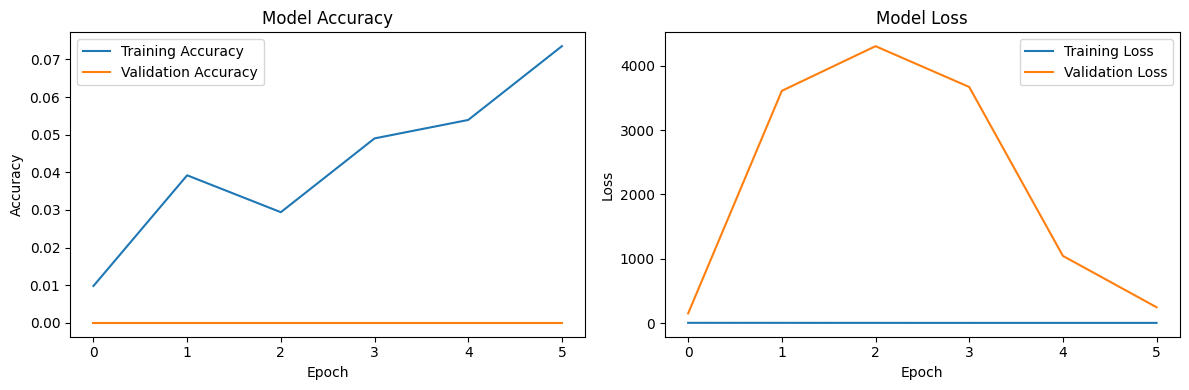

Final validation accuracy: 0.0000


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the preprocessed data
X_train = np.load('X_train_4batches.npy')
y_train = np.load('y_train_4batches.npy').astype(float)  # Ensure float type
entity_names = np.load('entity_names_4batches.npy', allow_pickle=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x

# Define the CNN model for regression
def create_cnn_regression_model(input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)
    
    # Initial convolution
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    
    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)
    
    # Dense layers
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer (regression)
    outputs = layers.Dense(1)(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
model = create_cnn_regression_model(input_shape=X_train.shape[1:])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
    ]
)

# Save the trained model
model.save('cnn_regression_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Print final MAE
final_mae = history.history['val_mean_absolute_error'][-1]
print(f"Final validation Mean Absolute Error: {final_mae:.4f}")

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_val, y_val)
print(f"Test Mean Absolute Error: {test_mae:.4f}")